<center>
    <h1> ILI286 - Computación Científica II </h1>
    <h2> Tarea 5 </h2>
    <h2> [S]cientific [C]omputing [T]eam </h2>
    <br>
    <b> Ignacio Sfeir </b><br>
    <b> ignacio.sfeir.alumnos.usm.cl </b><br>
    <b> 201104725-7 </b>
</center>

_Junio 2017_

# Introducción

En el siguiente informe se estudiarán EDP parabólicas, específicamente la ecuación de calor con dos dimensiones espaciales y una temporal, a través de aproximaciones numéricas haciendo uso del método de diferencias finitas, y además se estudiará la aplicación de la ecuación de calor para el manejo de imágenes.


# Pregunta 3

\begin{align}
u_t &= \alpha\, \Delta u     \hspace{8.5cm} (1)\\
c\cdot u(\Gamma, t) + (1-c)\cdot\dfrac{\partial u}{\partial \mathbf{n}}(\Gamma,t) &= 0, \quad t > 0, c \in (0,1) \hspace{5.6cm}  (2)\\
u(x,y,0) = f(x,y) &= \dfrac{x\,y\,(x-10)\,(y-10)}{x+3}, \quad (x,y) \in [0,10]^2    \hspace{2.2cm} (3)
\end{align}

## 1.-
Aplicando diferencias finitas para discretizar el espacio: 
\begin{align}
u(x,y,t) = W_{i,j,k} \\
u_x = \frac{W_{i+1,j,k} - W_{i,j,k}}{\Delta x}\\
u_{xx} = \frac{W_{i+1,j,k} - 2W_{i,j,k} + W_{i-1,j,k}}{\Delta x^2}\\
u_y = \frac{W_{i,j+1,k} - W_{i,j,k}}{\Delta y}\\
u_{yy} = \frac{W_{i,j+1,k} - 2W_{i,j,k} + W_{i,j-1,k}}{\Delta y^2}\\
u_t = \frac{W_{i,j,k+1} - W_{i,j,k}}{\Delta t}\\
\end{align}

Para la discretización utilizaremos x=y=h para fromar una grilla equiespaciada. Así, la ecuación (1) queda

\begin{align}
\frac{W_{i,j,k+1} - W_{i,j,k}}{\Delta t} = \alpha (\frac{W_{i+1,j,k} - 2W_{i,j,k} + W_{i-1,j,k}}{\Delta x^2} + \frac{W_{i,j+1,k} - 2W_{i,j,k} + W_{i,j-1,k}}{\Delta y^2})
\end{align}

Despejando y reemplazando por h,

\begin{align}
W_{i,j,k+1}= W_{i,j,k} + \frac{\alpha \Delta t}{\Delta h^2} (W_{i+1,j,k} - 4W_{i,j,k} + W_{i-1,j,k} + W_{i,j+1,k} + W_{i,j-1,k}) \hspace{3cm} (1.2)
\end{align}

Por simplicidad, se define

\begin{align}
\sigma = \frac{\alpha \Delta t}{\Delta h^2}
\end{align}

Y queda,

\begin{align}
W_{i,j,k+1}= W_{i,j,k}(1-4\sigma) + \sigma (W_{i+1,j,k} + W_{i-1,j,k} + W_{i,j+1,k} + W_{i,j-1,k}) \hspace{3cm} (1.1)
\end{align}


Para interpretar $\frac{\delta u}{\delta n}$ es necesario separarlo según los 4 bordes de la frontera en $x,y \in [0,10]^2$ definida por $\Gamma$, ya que cada borde se multiplica por el vector normal unitario hacia afuera del mismo. Estos vectores son (-1,0) izquierda, (1,0) derecha, (0,1) arriba y ((0,-1) abajo, quedando 4 ecuaciones para discretizar (2):


<b>Frontera [0,y] (izquiera), vector (-1,0)</b>
\begin{align}
W_{0,j,k} = -\frac{(c-1)}{c} \cdot \frac{W_{1,j,k} - W_{0,j,k}}{\Delta h} \\
\end{align}

Llamamos $C = \frac{(c-1)}{c \cdot \Delta h}$ y despejando,

\begin{align}
W_{0,j,k} = \frac{C}{C-1} \cdot W_{1,j,k} \hspace{3cm} (2.1)
\end{align}

<b>Frontera [10,y] (derecha), vector (1,0)</b>

\begin{align}
W_{9,j,k} = C \cdot W_{10,j,k} - W_{9,j,k} \\
W_{10,j,k} = \frac{C+1}{C} \cdot W_{9,j,k} \hspace{3cm} (2.2)
\end{align}

<b>Frontera [x,10] (arriba), vector (0,1)</b>

\begin{align}
W_{i,9,k} = C \cdot W_{i,10,k} - W_{i,9,k} \\
W_{i,10,k} = \frac{C+1}{C} \cdot W_{i,9,k} \hspace{3cm} (2.3)
\end{align}

<b>Frontera [x,0] (abajo), vector (0,-1)</b>

\begin{align}
W_{i,0,k} = -C \cdot W_{i,0,k} - W_{i,0,k} \\
W_{i,0,k} = \frac{C}{C-1} \cdot W_{i,1,k} \hspace{3cm} (2.4)
\end{align}


## 2.-
La condición de frontera es una combinación de la incógnita y su derivada, por lo tanto es una condición de Robin. Para resolver numéricamente el problema, se utiliza la discretización (1.1) para calcular un punto en el tiempo siguiente utilizando 5 puntos del tiempo anterior ($W_{i,j,k}, W_{i+1,j,k}, W_{i-1,j,k}, W_{i,j+1,k}, W_{i,j-1,k}$), pero este método sólo sirve para los puntos interiores ya que en las fronteras aparecen términos como $W_{-1,0,k}$, asi que para las fronteras se utiliza la condición de borde a través de las 4 ecuaciónes (2.1), (2.2), (2.3) y (2.4) utilizando los valores de puntos interiores calculados anteriormente. Además, la ecuación 3 nos permite conocer los valores de temperatura para todo el espacio en el tiempo t=0.

Si c=0 o c=1 la condición de frontera queda más simple de resolver porque se elimina uno de los dos términos. Resolviendo para cada una:

<b> c=0 </b>

\begin{align}
\dfrac{\partial u}{\partial \mathbf{n}}(\Gamma,t) &= 0
\end{align}

Discretizando, por ejemplo para la frontera izquierda,

\begin{align}
\frac{W_{1,j,k} - W_{0,j,k}}{\Delta h} = 0
\end{align}

De donde

\begin{align}
W_{1,j,k} = W_{0,j,k}
\end{align}

Y esta igualdad se cumple para todas las fronteras, por lo tanto, si c=0 entonces cada punto del borde es igual a su punto interior adyacente.

<b> c=1 </b>

\begin{align}
u(\Gamma, t) = 0
\end{align}

Entonces los bordes para todo instante de tiempo son iguales a 0.



## 3.-

$\Delta x, \Delta y, \Delta t$ se deben definir de tal forma que el esquema explícito sea estable, es decir, que
\begin{align}
\frac{\alpha \Delta t}{\Delta h^2} < \frac{1}{2}
\end{align}

Por simplicidad se elijen los valores $\Delta x = \Delta y = \Delta h = 1$ y $\Delta t = 0.25$, con $\alpha=1$ tal que

\begin{align}
\frac{1 \cdot 0.25}{1^2} = 0.25 < \frac{1}{2}
\end{align}

In [1]:
import numpy as np

def calor(c, W0, t_max, a, dt):
    
    dh = 1
    s = float(a*dt)/float(dh**2)
    k_max = int(t_max/dt) + 1
    C = float(c-1.0)/float(c*dh)
    dimx, dimy = W0.shape
    
    W = np.zeros((k_max-1, dimx, dimy))
    
    W = np.append(np.array([W0]), W, axis=0)
    
    for k in range(k_max-1):
        # puntos interiores siguientes
        for i in range(1, dimx-1):
            for j in range(1, dimy-1):
                W[k+1][i][j] = W[k][i][j]*(1-4*s) + s*(W[k][i+1][j] + W[k][i-1][j] + W[k][i][j-1] + W[k][i][j+1])
        
        # puntos del borde siguientes
        
        # izquierda
        for j in range(1, dimy-1):
            W[k+1][0][j] = C/(C-1.0) * W[k+1][1][j]
        
        # derecha
        for j in range(1, dimy-1):
            W[k+1][dimx-1][j] = (C+1.0)/C * W[k+1][dimx-2][j]
        
        # arriba
        for i in range(1, dimx-1):
            W[k+1][i][dimy-1] = (C+1.0)/C * W[k+1][i][dimy-2]
        
        # abajo
        for i in range(1, dimx-1):
            W[k+1][i][0] = C/(C-1.0) * W[k+1][i][1]
        
        # esquinas
        W[k+1][0][0] = C/(C-1.0) * W[k+1][1][0]
        W[k+1][dimx-1][0] = C/(C-1.0) * W[k+1][dimx-1][1]
        W[k+1][dimx-1][dimy-1] = (C+1.0)/C * W[k+1][dimx-2][dimy-1]
        W[k+1][0][dimy-1] = (C+1.0)/C * W[k+1][dimx-1][dimy-2]
    
    return W

# temperatura en t=0
W0 = np.zeros((11,11))
f = lambda x,y: float(x*y*(x-10)*(y-10))/float(x+3)
for i in range(11):
    for j in range(11):
        W0[i][j] = f(i,j)

W = np.zeros(9, dtype=object)
for i in range(9):
    c = (i+1)*0.1
    W[i] = calor(c, W0, 5, 1, 0.25)

## 4.-

In [2]:
import matplotlib.pyplot as plt
from matplotlib import cm
from mpl_toolkits.mplot3d import Axes3D
import ipywidgets as widgets

def graficar(t, c):
    
    T = W[int(c/0.1) - 1][int(t/0.25)]
    Y = list(range(0,11))
    X = list(range(0,11))
    
    x,y = np.meshgrid(X,Y)
    
    fig = plt.figure(figsize=(15,10))
    plot3d = fig.gca(projection='3d')
    
    plot3d.set_xlim([0,10])
    plot3d.set_ylim([0,10])
    plot3d.set_zlim([0,80])
    
    plot3d.plot_surface(x, y, T, cmap=cm.coolwarm, linewidth=0, antialiased=False)
    
    plot3d.set_xlabel("X")
    plot3d.set_ylabel("Y")
    plot3d.set_zlabel("T°")
    plt.title("Ecuación de calor")
    
    
    plt.show()


widgets.interact(graficar,t = (0,5,0.25), c = (0.1,0.9,0.1))

<function __main__.graficar>

# Pregunta 4
## 1.-

dim =  (512, 512)


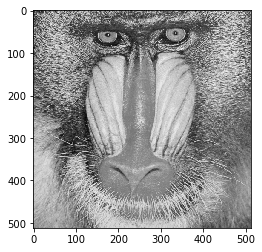

In [4]:
from PIL import Image

I0 = np.array(Image.open("mandrill.png").convert("L"))

print ("dim = ", I0.shape)

plt.imshow(I0, cmap='gray')
plt.show()

## 2.-
Por razones de tiempo de ejecución y de memoria se utilizó Tmax=20, pero esto es facilmente modificable en la linea n° 5 a continuación, en el tercer parámetro de la función "calor".

In [5]:
print ("Cargando...Espere por favor")
I = np.zeros(3, dtype=object)
for i in range(3):
    c = (i+1)*0.3
    I[i] = calor(c, I0, 20, 1, 0.25)
    print ((i+1), "/", 3)
print("Listo!")

Cargando...Espere por favor
1 / 3
2 / 3
3 / 3
Listo!


## 3.-

In [6]:
def im_show(t, c):
    plt.imshow(I[int(c/0.3) - 1][int(t/0.25)], cmap='gray')
    plt.show()

widgets.interact(im_show,t = (0,20,0.25), c = (0.3,0.9,0.3))

<function __main__.im_show>

## 4.- 
El parámetro c, tal como se explicó en la pregunta anterior para sus casos extremos, lo que hace es afectar los bordes de la imágen, y por tanto de a poco va afectando los puntos interiores ya que estos se calculan utilizando también los puntos del borde.
A partir del experimento, es posible notar que aumentando c se aclara la imágen, y que a partir de c=0.8 aproximadamente, los valores comienzan a dispararse generando que se pierda rapidamente la imágen, por lo tanto es mejor buscar un c intermedio, y se utilizará c=0.3.
Además, se ve como los bordes van desapareciendo de la imágen, particularmente el inferior y derecho, efecto del proceso con el tiempo

# Pregunta 5

## 1.-

dim =  (383, 506)


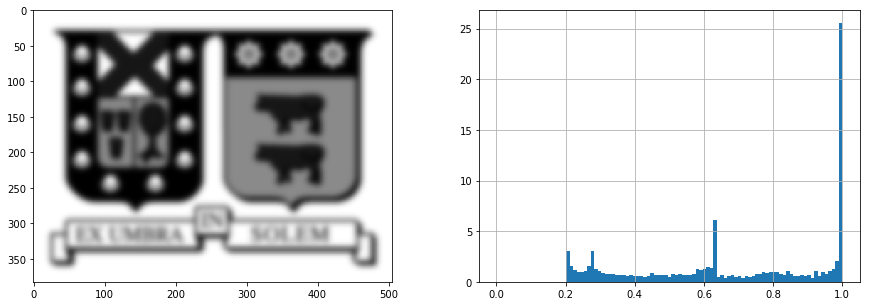

In [7]:
It0 = np.array(Image.open("blurred.tiff"))

def show_imhist(im):
    plt.figure(figsize=(15,5))

    plt.subplot(1,2,1)
    # Mostrar imagen en tiempo k
    plt.imshow(im, cmap='gray')
    
    # Mostrar histograma
    plt.subplot(1,2,2)
    bins=np.linspace(0,1,100)
    plt.hist(im.flatten() ,bins=bins, normed=True)
    plt.grid(True)

    plt.show()

print ("dim = ", It0.shape)

show_imhist(It0)

El histograma representa en el eje x a distintos colores, y en el eje y la cantidad de ese color presente en la imágen, donde 0 es blanco y 1 en negro, y ya que la imágen está en escalas de gris, es esperable que su componente principal sea en este caso el negro.

## 2.-
Nuevamente, por razones de tiempo de ejecución y de memoria se utilizó Tmax=20, pero esto es facilmente modificable en la linea n° 8 a continuación, en el tercer parámetro de la función "calor".

In [8]:
print ("Cargando...Espere por favor")
num = 9
It = np.zeros(num, dtype=object)
c = 0.3
for i in range(num):
    ##dt = i*0.15 + 0.1
    dt = i*0.5 + 0.5
    It[i] = calor(c, It0, 20, -1, dt)
    print ((i+1), "/", num)
print("Listo!")

Cargando...Espere por favor
1 / 9
2 / 9
3 / 9
4 / 9
5 / 9
6 / 9
7 / 9
8 / 9
9 / 9
Listo!


## 3.-

In [9]:
def middle(t, Dt):
    show_imhist(It[int((Dt-0.5)/0.5)][int(t*10*0.1/Dt)])   ##[int(t*10   0.1/0.25*10*t    0.1/0.4*10*t)]

widgets.interact(middle, t = (0,20,0.1), Dt = (0.5, 4.5, 0.5))  ##(0.1,0.4,0.15))

<function __main__.middle>

¿Se puede revertir el efecto en la imagen? Viendo la imágen detenidamente, parece mejorar en las primeras iteraciones, pero luego tal como se ve en la imágen, ésta se va cubriendo de una capa gris.

¿qué ocurre después de harto tiempo? La imágen se pierde completamente.

¿Qué ocurre con la distribución (entragada por el histograma) a medida que avanza el tiempo? Dentro del rango en que todavia se ve la imágen, el histograma muestra una disminución constante de la cantidad de negro (1) presente, además de cambios menores en la cantidad de los demás colores. Luego de este tiempo, se ve como el proceso ya diverje sin mostrar ningún patrón aparente, destruyendo la imágen.

¿podemos utilizar esto de alguna manera? Dados los resultados, no parece ser una forma confiable para realizar el propósito original de hacer deblur.

¿qué puede concluir respecto al efecto de  $\Delta t$  sobre el algoritmo? Un aumento de este hace que el proceso sea más rápido, es decir, la función de calor ejerce un mayor cambio en la matriz con cada iteración. Además, para $\Delta t$ pequeños no parece notarse la aparente mejora inicial.

# Conclusiones

En conclusión, la ecuación de calor es un método efectivo para generar el efecto de Blur en una imágen, sin embargo este proceso no es eficientemente invertible utilizando el mismo método. esto puede deberse a que "reconstruir" una imágen que ha sido deteriorada probablemente requiere de mayor información y quizas alguna forma de interpolar o estimar lo que debiese ir en cada punto de la imágen.

# Referencias

Análisis Numérico - Timothy Sauer (2da Edición), capítulo 8.